In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
data = pd.read_csv('twitter.csv')
data.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
data.shape

(24783, 7)

In [4]:
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

In [5]:
print(stopword)

{'we', 'his', 'of', 'after', 'o', 'into', 'on', "shan't", 'further', 'couldn', 'weren', 'why', 'these', 'few', "don't", 'most', 'd', 'through', "you're", 'y', "you've", 'itself', "mustn't", 'just', 'having', 'wasn', 'more', 'should', 'doesn', "mightn't", 'while', 'ma', 'over', 'such', 'which', 'are', 'about', 'hasn', 'up', 'him', 'down', 'haven', 'yours', 'from', 'doing', 'is', "shouldn't", 'where', 'yourselves', 'can', 'nor', "it's", 'she', 'then', "aren't", 'mustn', 'didn', 'not', 'the', "couldn't", 'hers', 'some', 'herself', 'at', "that'll", 'm', 'than', 'shan', 'was', 'a', 'when', "wouldn't", 'your', 'mightn', 'now', 'them', 'but', 'theirs', 'be', 'our', 'or', 'her', 'it', 'in', 'isn', 'hadn', "should've", 'how', 'if', 'ours', 'against', "hasn't", "wasn't", 'that', "needn't", "won't", 've', 'for', 'this', 'wouldn', 'my', 'between', 'himself', 'i', 'so', 'he', 'all', 'under', 'shouldn', 'needn', 'during', 'to', 'no', 'ain', "didn't", 'each', 'being', 'themselves', 'who', 'out', 'own

In [6]:
#Cleaning the text
def cleaned_text(text):
    #converting text to lower
    text = str(text).lower()
    #removing * and ? in the given text
    text = re.sub('\[.*?\]','',text)
    #removing http related texts
    text = re.sub('https?://\S+|www\.\S+','',text)
    #removing punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    #removing \n
    text = re.sub('\n','',text)
    #removing \d and \w
    text = re.sub('\w*\d\w*','',text)
    #removing words that are not from stop words
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    #stemming words
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["tweet"] = data["tweet"].apply(cleaned_text)

In [7]:
print(data["tweet"])

0         rt mayasolov woman shouldnt complain clean ho...
1         rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2         rt urkindofbrand dawg rt  ever fuck bitch sta...
3                   rt cganderson vivabas look like tranni
4         rt shenikarobert shit hear might true might f...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object


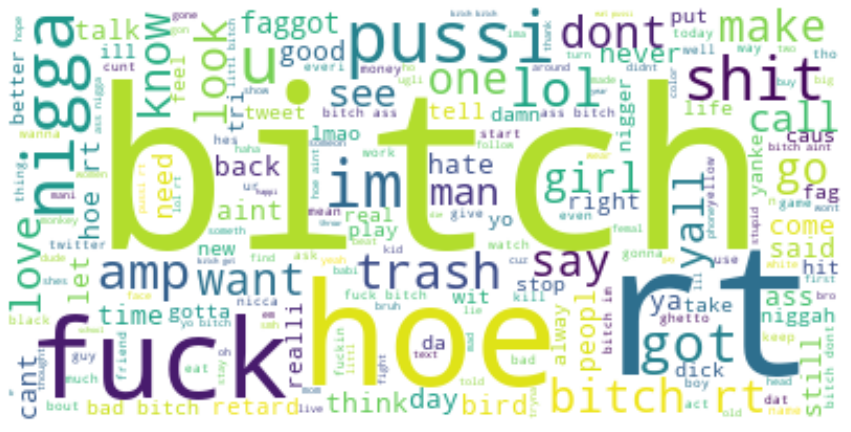

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
data.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Positive,Negative,Neutral
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean ho...,0.147,0.157,0.696
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,0.000,0.280,0.720
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch sta...,0.000,0.577,0.423
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni,0.333,0.000,0.667
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might f...,0.154,0.407,0.440


In [10]:
F_data = data[["tweet","Positive","Negative","Neutral"]]
F_data.head(5)

,tweet,Positive,Negative,Neutral
0,rt mayasolov woman shouldnt complain clean ho...,0.147,0.157,0.696
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,0.000,0.280,0.720
2,rt urkindofbrand dawg rt ever fuck bitch sta...,0.000,0.577,0.423
3,rt cganderson vivabas look like tranni,0.333,0.000,0.667
4,rt shenikarobert shit hear might true might f...,0.154,0.407,0.440


In [11]:
#finding highest value
x = sum(F_data["Positive"])
y = sum(F_data["Negative"])
z = sum(F_data["Neutral"])
def sentiment_score(a,b,c):
    if(a>b) and(a>c):
        print("Positive 😊 ")
    elif(b>a) and (b>c):
        print("Negative 😠")      
    else:
        print("Neutral 🙂")
sentiment_score(x,y,z)        

Neutral 🙂


In [12]:
print("Positive:",x)
print("Negative:",y)
print("Neutral:",z)

Positive: 2880.086000000009
Negative: 7201.020999999922
Neutral: 14696.887999999733
